In [1]:
import pandas as pd

# long data 만들기

- 각 변수는 하나의 컬럼에 배치
- 각 관측치는 한행에 1건씩 분리되어 배치
- 각 값은 개별 셀에 배치

- melt()
- pivot()
- pivot_table() : 집계 함수를 적용 

In [ ]:
# pew data load
#C:\Users\Admin\hipython\data\pew.csv
#pd.read_csv(r'C:\Users\Admin\hipython\data\pew.csv') #raw-string
df = pd.read_csv('./data/pew.csv')
type(df)

pandas.core.frame.DataFrame

In [7]:
df.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [10]:
df.head(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


In [ ]:
df.melt(id_vars='religion').sort_values('religion').head(18) #메소드체인

,religion,variable,value
0,Agnostic,<$10k,27
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96
126,Agnostic,$100-150k,109
36,Agnostic,$20-30k,60
108,Agnostic,$75-100k,122
18,Agnostic,$10-20k,34
90,Agnostic,$50-75k,137
72,Agnostic,$40-50k,76
54,Agnostic,$30-40k,81


In [15]:
df_melt = df.melt(id_vars='religion')
df_melt

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [16]:
df_melt['religion']

0                   Agnostic
1                    Atheist
2                   Buddhist
3                   Catholic
4         Don’t know/refused
               ...          
175                 Orthodox
176          Other Christian
177             Other Faiths
178    Other World Religions
179             Unaffiliated
Name: religion, Length: 180, dtype: object

In [18]:
cond = df_melt['religion'] == 'Agnostic'

In [19]:
df_melt.loc[ cond ]

,religion,variable,value
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


variable > income
value > count

In [22]:
df_melt_rename = df_melt.rename(columns={ 'variable':'income'  , 'value':'count'   })

In [23]:
df_melt_rename

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [24]:
df_melt_new = df.melt(id_vars='religion', var_name= 'income', value_name='count')
df_melt_new

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [42]:
df_pivot = df_melt_new.pivot(  #long data > wide data
    index='religion',
    columns='income',
    values='count'
).reset_index()

In [43]:
df_pivot

income,religion,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
0,Agnostic,34,109,60,81,76,137,122,27,84,96
1,Atheist,27,59,37,52,35,70,73,12,74,76
2,Buddhist,21,39,30,34,33,58,62,27,53,54
3,Catholic,617,792,732,670,638,1116,949,418,633,1489
4,Don’t know/refused,14,17,15,11,10,35,21,15,18,116
5,Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
6,Hindu,9,48,7,9,11,34,47,1,54,37
7,Historically Black Prot,244,81,236,238,197,223,131,228,78,339
8,Jehovah's Witness,27,11,24,24,21,30,15,20,6,37
9,Jewish,19,87,25,25,30,95,69,19,151,162


In [46]:
df_pivot = df_melt_new.pivot_table(
    index='religion',
    columns='income',
    values='count',
    aggfunc='min'
)
df_pivot

income,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,34,109,60,81,76,137,122,27,84,96
Atheist,27,59,37,52,35,70,73,12,74,76
Buddhist,21,39,30,34,33,58,62,27,53,54
Catholic,617,792,732,670,638,1116,949,418,633,1489
Don’t know/refused,14,17,15,11,10,35,21,15,18,116
Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
Hindu,9,48,7,9,11,34,47,1,54,37
Historically Black Prot,244,81,236,238,197,223,131,228,78,339
Jehovah's Witness,27,11,24,24,21,30,15,20,6,37


## 빌보드데이터 long data 연습

In [ ]:
billboard_df = pd.read_csv('./data/billboard.csv')
billboard_df.info()

In [27]:
billboard_df.head(2)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
billboard_df.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [38]:
id_vars = billboard_df.columns[:5].tolist()
id_vars

['year', 'artist', 'track', 'time', 'date.entered']

In [39]:
b_df_melt  = billboard_df.melt(id_vars=id_vars, var_name= 'week', value_name='rank')
b_df_melt

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


# apply() 

In [47]:
df = pd.DataFrame(
  {
    "a":[10,20,30],
    "b":[20,30,40]
  }
)
df

,a,b
0,10,20
1,20,30
2,30,40


In [48]:
df**2

,a,b
0,100,400
1,400,900
2,900,1600


In [ ]:
df/10 #vector화

,a,b
0,1.0,2.0
1,2.0,3.0
2,3.0,4.0


In [53]:
def make_sq(x, e=2):
  return x ** e

In [56]:
df.apply(make_sq, e=3)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [59]:
import pandas as pd

# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}
sal_df = pd.DataFrame(data)
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Salary  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [61]:
def age_category(age):
  if age<30 :
    return '20대'
  elif age<40 :
    return '30대'
  else:
    return '40대 이상'

In [62]:
sal_df['Age_category'] = sal_df['Age'].apply(age_category)

In [63]:
sal_df

,Name,Age,Salary,Age_category
0,Alice,25,5000,20대
1,Bob,45,7000,40대 이상
2,Charlie,35,6500,30대
3,David,32,5500,30대
4,Eva,28,6000,20대


In [ ]:
# 보너스 컬럼 20%

In [69]:
def calc_bonus(salary, rate=0.2):
  return salary*rate

In [70]:
sal_df['bonus'] = sal_df['Salary'].apply(calc_bonus, rate=0.3)
sal_df

,Name,Age,Salary,Age_category,bonus
0,Alice,25,5000,20대,1500.0
1,Bob,45,7000,40대 이상,2100.0
2,Charlie,35,6500,30대,1950.0
3,David,32,5500,30대,1650.0
4,Eva,28,6000,20대,1800.0


# 데이터 병합

## concat

In [2]:
import pandas as pd

In [3]:
#dataframe 생성
df_1 = pd.read_csv('./data/concat_1.csv')
df_2 = pd.read_csv('./data/concat_2.csv')
df_3 = pd.read_csv('./data/concat_3.csv')

In [4]:
#df_1, df_2, df_3

In [5]:
# column list 가 동일 > 병합
total_df = pd.concat([df_1, df_2, df_3], ignore_index=True)
#total_df.loc[3]
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [85]:
#total_df.iloc[3]
#total_df.reset_index()

In [86]:
#total_df

## 새로운 행 추가

In [6]:
add_ser = pd.Series(['a100', 'b100', 'c100', 'd100'])
add_ser

0    a100
1    b100
2    c100
3    d100
dtype: object

In [8]:
total_df_add = pd.concat([total_df, add_ser]) # xxxxx
#total_df_add

In [10]:
col_list = total_df.columns.to_list()

In [15]:
# dataframe으로 만든다.
empty_df = pd.DataFrame( columns = col_list)
# empty_df[0] = add_ser
empty_df

,A,B,C,D


In [14]:
add_ser.index = empty_df.columns
add_ser

A    a100
B    b100
C    c100
D    d100
dtype: object

In [16]:
empty_df.loc[0] = add_ser
empty_df

,A,B,C,D
0,a100,b100,c100,d100


In [18]:
new_total_df = pd.concat([total_df,empty_df ], ignore_index=True)
new_total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


시리즈를 행으로 만들어서 concat

- 원본과 동일한 컬럼을 갖는 빈데이터프레임 생성
- 컬럼이름 = 인덱스이름 시리즈 생성
- 빈데이터프레임에 행으로 시리즈를 추가
- concat(원본, 빈데이터프레임)

- concat

## merge
- 키를 기준으로 합친다.
- sql 에서 join

In [2]:
import pandas as pd

In [3]:
# 매출 데이터
sales_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Amount': [250, 300, 150, 400]
})

# 고객 데이터
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'],
    'Region': ['North', 'South', 'East', 'West']
})

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Date        4 non-null      object
 2   Amount      4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4 non-null      int64 
 1   Name        4 non-null      object
 2   Region      4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [6]:
pd.merge(customer_data, sales_data, on='CustomerID')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250
1,102,Bob,South,2023-01-03,300
2,103,Charlie,East,2023-01-05,150


In [7]:
pd.merge(customer_data, sales_data, on='CustomerID', how='left')

,CustomerID,Name,Region,Date,Amount
0,101,Alice,North,2023-01-01,250.0
1,102,Bob,South,2023-01-03,300.0
2,103,Charlie,East,2023-01-05,150.0
3,105,Eva,West,NaN,NaN


how - 병합 기준 지정
- left
- right
- inner(default)
- outer

on - 병합을 위한 key 지정

# 그룹 연산

groupby() + aggregation 집계

In [9]:
gap_df = pd.read_csv('./data\gapminder.tsv', sep='\t')
gap_df.info() #data\gapminder.tsv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


| 컬럼명         | 설명                                           |
| ----------- | -------------------------------------------- |
| `country`   | 국가 이름                                        |
| `continent` | 대륙 (Asia, Europe, Africa, Americas, Oceania) |
| `year`      | 연도                                           |
| `lifeExp`   | 기대수명 (년)                                     |
| `pop`       | 인구 수                                         |
| `gdpPercap` | 1인당 GDP                                      |


In [16]:
gap_df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [14]:
#gap_df.loc[:,'country']
gap_df['country'].unique().shape

(142,)

In [ ]:
# 대륙, 연도

In [21]:
gap_df.groupby('country')[['lifeExp', 'pop']].sum()

,lifeExp,pop
country,,
Afghanistan,449.746,189884585
Albania,821.195,30962990
Algeria,708.362,238504874
Angola,454.602,87712681
Argentina,828.725,343226879
...,...,...
Vietnam,689.754,654822851
West Bank and Gaza,723.944,22183278
"Yemen, Rep.",561.365,130118302


In [24]:
gap_df.groupby('country').get_group('Afghanistan')

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [26]:
gap_df.groupby('continent')['country'].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

count(), size(), mean(), std(), quantile(), max(), min(), sum(), var(), describe()

In [27]:
gap_df.groupby('continent')['country'].agg(['count', 'size'])

,count,size
continent,,
Africa,624,624
Americas,300,300
Asia,396,396
Europe,360,360
Oceania,24,24


# 자동차 생산량 데이터 모양 만들기

In [29]:
veh_df = pd.read_csv('./data/vehicle_prod.csv')
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6 non-null      object 
 1   2007        6 non-null      float64
 2   2008        6 non-null      float64
 3   2009        6 non-null      float64
 4   2010        6 non-null      float64
 5   2011        6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


In [32]:
veh_df.rename(columns={'Unnamed: 0':'country'}, inplace=True)
veh_df

,country,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [36]:
#veh_df.set_index('country', inplace=True)
veh_df

,2007,2008,2009,2010,2011
country,,,,,
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [37]:
veh_df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)
veh_df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [39]:
type(veh_df['2007'])

pandas.core.series.Series

In [ ]:
veh_df[['2007']] #dataframe, series x

,2007
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [42]:
veh_df.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


In [ ]:
veh_df.corr() #상관계수

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [44]:
veh_df.sum()

2007    54.12
2008    50.77
2009    45.04
2010    55.68
2011    57.25
dtype: float64

In [45]:
veh_df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [46]:
# 총 생산량 컬럼 추가
veh_df['total_production'] = veh_df.sum(axis=1)

In [49]:
veh_df.loc['total'] = veh_df.sum()

In [50]:
veh_df

,2007,2008,2009,2010,2011,total_production
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35
total,54.12,50.77,45.04,55.68,57.25,262.86


In [53]:
import numpy as np

# 결측치 처리

In [54]:
pd.NA, np.nan

(<NA>, nan)

In [57]:
pd.isnull(np.nan), pd.isnull(pd.NA), pd.isnull(20)

(True, True, False)

In [ ]:
# 딕셔너리
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}
data

{'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
 'age': [25, nan, 30, 22, nan],
 'score': [90, 85, nan, 88, 95],
 'city': ['Seoul', 'Busan', nan, 'Incheon', 'Seoul']}

In [60]:
df = pd.DataFrame(data)
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes


In [ ]:
#null  인 값의 갯수
df.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [64]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


## o 으로 null 을 없앤다. 

In [ ]:
df.dropna()

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


## 채우기

In [ ]:
df.fillna(0) #df['age'].fillna(0)

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,0.0,85.0,Busan
2,Charlie,30.0,0.0,0
3,David,22.0,88.0,Incheon
4,Eva,0.0,95.0,Seoul


In [70]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [68]:
# 대표값: 평균, 중앙값, 최빈값
df['age'].mean()

np.float64(25.666666666666668)

In [69]:
df.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [ ]:
# age 속성의 평균값으로 null 처리

In [ ]:
# score 속성의 중앙값으로 null 처리

## bfill, ffill

In [73]:
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [74]:
df['score'].fillna(method='bfill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12660\1911892593.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['score'].fillna(method='bfill')


0    90.0
1    85.0
2    88.0
3    88.0
4    95.0
Name: score, dtype: float64

# 전처리 연습 - 타이타닉 데이터

In [77]:
titanic_df = pd.read_csv('./data/titanic.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
# age
titanic_df['Age'].mean(), titanic_df['Age'].median()

(np.float64(29.69911764705882), 28.0)

In [82]:
titanic_df['Age'].fillna( titanic_df['Age'].median(), inplace=True      )
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_12660\2774036834.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna( titanic_df['Age'].median(), inplace=True      )


In [83]:
titanic_df['Age'].mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

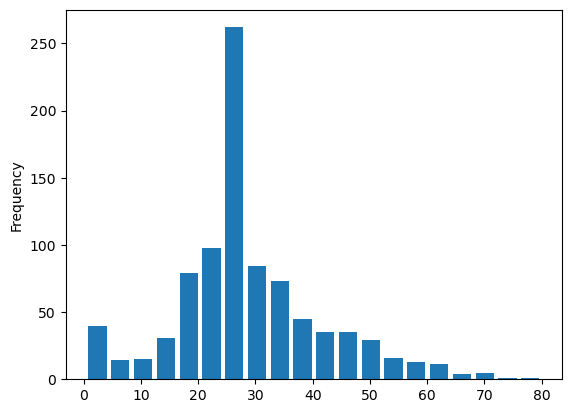

In [88]:
titanic_df['Age'].plot(kind='hist', bins=20, rwidth=0.8)

# cabin

In [91]:
titanic_df['Cabin'].unique().tolist()

[nan,
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

In [92]:
# 'unknown'으로 채우기
titanic_df['Cabin'].fillna('Unknown', inplace=True)

In [93]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
titanic_df['Cabin'].value_counts().head(10)

Cabin
Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
D                3
E101             3
C22 C26          3
F33              3
C83              2
Name: count, dtype: int64

# Embarked 속성 

# 범주형 데이터 인코딩
## 원핫인코딩

In [105]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [106]:
pd.get_dummies(titanic_df, columns=['Sex', 'Embarked']).head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,Unknown,False,True,False,False,True


In [102]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 라벨 인코딩

In [ ]:
#label encoding
titanic_df['Sex'].map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [104]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 전처리 연습 : 지하철카드사용내역 전처리

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('./data\CARD_SUBWAY_MONTH_202102.csv')
df.head(3)
#df.info()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20210201,중앙선,용문,1282,1259,20210204,NaN
20210201,중앙선,지평,48,43,20210204,NaN
20210201,중앙선,아신,415,413,20210204,NaN


In [7]:
#df = df.iloc[:, :-1]
df = pd.read_csv(
    './data/CARD_SUBWAY_MONTH_202102.csv',
    usecols=range(6)
)
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303
16747,20210228,중앙선,양평,3299,3187,20210303
16748,20210228,중앙선,원덕,322,304,20210303
16749,20210228,중앙선,용문,1899,1716,20210303


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [ ]:
# 노선명 데이터의 종류, 갯수

In [10]:
df['노선명'].unique().shape

(25,)

In [ ]:
# 9호선 열 병합여부 결정

In [19]:
#df['노선명'].value_counts()
df_line_cnt = df.groupby('노선명').size().reset_index()
df_line_cnt

,노선명,0
0,1호선,280
1,2호선,1400
2,3호선,937
3,4호선,728
4,5호선,1484
5,6호선,1051
6,7호선,1428
7,8호선,476
8,9호선,700
9,9호선2~3단계,364


In [21]:
import matplotlib.pyplot as plt

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

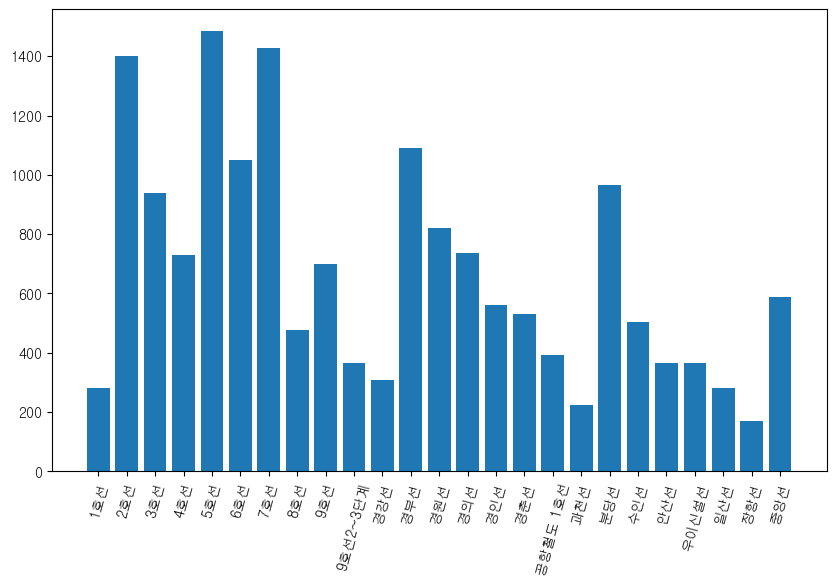

In [30]:
plt.figure(figsize=(10,6))
plt.bar(df_line_cnt['노선명'], df_line_cnt[0])  # 0 컬럼은 size()로 만들어진 Series
plt.xticks(rotation=75)
plt.show()

In [ ]:
# 5호선 역별 건수 막대차트

In [31]:
df[df['노선명']=='5호선']

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
419,20210201,5호선,하남풍산,4629,4624,20210204
420,20210201,5호선,미사,12743,12609,20210204
421,20210201,5호선,마천,5409,5566,20210204
422,20210201,5호선,거여,7499,7119,20210204
423,20210201,5호선,개롱,6040,6218,20210204
...,...,...,...,...,...,...
16319,20210228,5호선,개롱,2752,3029,20210303
16320,20210228,5호선,거여,3453,3336,20210303
16321,20210228,5호선,마천,3127,3382,20210303
16322,20210228,5호선,미사,6853,6878,20210303


In [34]:
df[df['역명']=='강동']

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
433,20210201,5호선,강동,18062,17155,20210204
1040,20210202,5호선,강동,18575,17290,20210205
1356,20210203,5호선,강동,18845,17611,20210206
2052,20210204,5호선,강동,18812,17671,20210207
2863,20210205,5호선,강동,18705,17515,20210208
3144,20210206,5호선,강동,11131,10528,20210209
4031,20210207,5호선,강동,7512,7149,20210210
4348,20210208,5호선,강동,18514,17317,20210211
5184,20210209,5호선,강동,18553,17307,20210212
5601,20210210,5호선,강동,17147,15221,20210213


In [ ]:
#df[df['노선명']=='5호선'].groupby('역명').size()
#모든 역이 28건(2/1에서 2/28일까지 1건씩 존재함)

In [36]:
df_line_5 = df[df['노선명']=='5호선']
df_line_5.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
419,20210201,5호선,하남풍산,4629,4624,20210204
420,20210201,5호선,미사,12743,12609,20210204
421,20210201,5호선,마천,5409,5566,20210204
422,20210201,5호선,거여,7499,7119,20210204
423,20210201,5호선,개롱,6040,6218,20210204


In [50]:
df_line_5_승객수 = df_line_5.groupby('역명')[['승차총승객수','하차총승객수']].sum().reset_index()
df_line_5_top_10 = df_line_5_승객수.sort_values(by='승차총승객수', ascending=False).head(10)
df_line_5_top_10

,역명,승차총승객수,하차총승객수
12,까치산,639237,622602
7,광화문(세종문화회관),630350,640269
52,화곡,615789,580939
36,여의도,565332,576983
40,오목교(목동운동장앞),498904,533946
0,강동,417865,393081
47,천호(풍납토성),416520,409844
23,발산,405898,413888
45,장한평,386762,383986
27,서대문,375249,382032


In [53]:
df_line_5_top_10_2 = df_line_5_승객수.sort_values(by='하차총승객수', ascending=False).head(10)


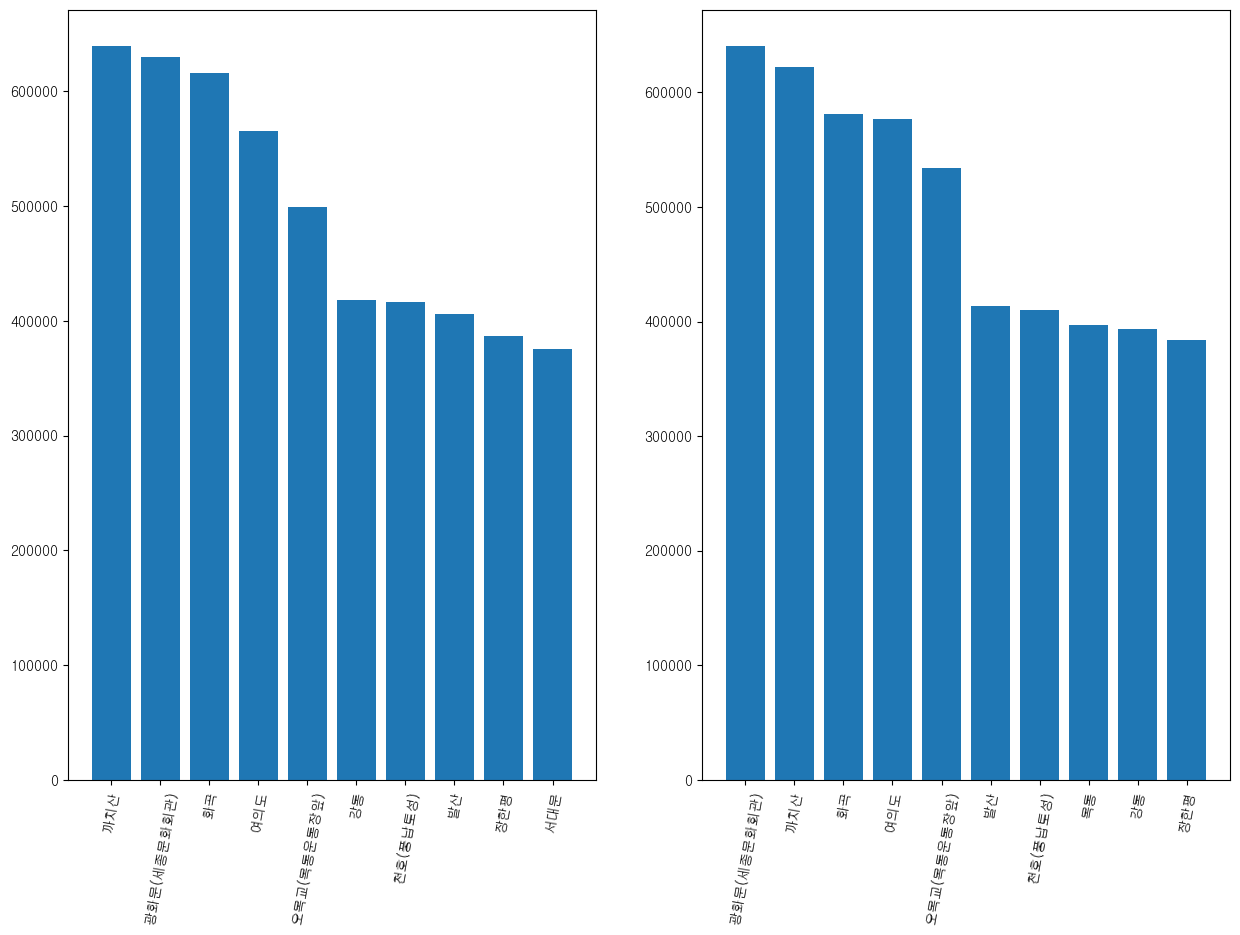

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
#승차
plt.bar(df_line_5_top_10['역명'],df_line_5_top_10['승차총승객수'] )
plt.xticks(rotation=80)

#하차
plt.subplot(1,2,2)
plt.bar(df_line_5_top_10_2['역명'],df_line_5_top_10_2['하차총승객수'] )
plt.xticks(rotation=80)
plt.show()

# 데이터 모양 정리하기

In [ ]:
# 인덱스 > pass
# 등록일자 drop, 사용일자 - 날짜로
# 총승객수 컬럼

In [75]:
df_new = df.drop(columns='등록일자')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 654.5+ KB


In [64]:
df_new['사용일자'].head(3) #2021-02-01 >  datetype

0    20210201
1    20210201
2    20210201
Name: 사용일자, dtype: int64

In [76]:
def changeDate(data):
  year = str(data)[0:4]
  month = str(data)[4:6]
  day = str(data)[6:8]  
  return year+'-'+month+'-'+day

In [68]:
changeDate(20210201)

'2021-02-01'

In [77]:
df_new['사용일자'] = df_new['사용일자'].apply(changeDate)

In [78]:
#df_new['사용일자1'] = df_new['사용일자1'].astype('datetime64')
df_new['사용일자'] = pd.to_datetime(df_new['사용일자'])
df_new.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,2021-02-01,중앙선,용문,1282,1259
1,2021-02-01,중앙선,지평,48,43
2,2021-02-01,중앙선,아신,415,413
3,2021-02-01,중앙선,양수,1463,1466
4,2021-02-01,중앙선,운길산,495,463


In [ ]:
#'승차총승객수’와 ‘하차총승객수’ 컬럼의 차이를 계산한 ‘승하차총승객수차이’, ‘승하차총승객수’ 컬럼을 생성하세요.
# 2호선 추출
# 2호선 역별 승하차총승객수차이, 승하차총승객수 
# 상위 10개 역 

In [80]:
#'승차총승객수’와 ‘하차총승객수’ 컬럼의 차이를 계산한 ‘승하차총승객수차이’, ‘승하차총승객수’ 컬럼을 생성하세요.
df_new['승하차총승객수차이'] = (
    df_new['승차총승객수'] - df_new['하차총승객수']
)

df_new['승하차총승객수'] = (
    df_new['승차총승객수'] + df_new['하차총승객수']
)
df_new

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이,승하차총승객수
0,2021-02-01,중앙선,용문,1282,1259,23,2541
1,2021-02-01,중앙선,지평,48,43,5,91
2,2021-02-01,중앙선,아신,415,413,2,828
3,2021-02-01,중앙선,양수,1463,1466,-3,2929
4,2021-02-01,중앙선,운길산,495,463,32,958
...,...,...,...,...,...,...,...
16746,2021-02-28,중앙선,오빈,216,236,-20,452
16747,2021-02-28,중앙선,양평,3299,3187,112,6486
16748,2021-02-28,중앙선,원덕,322,304,18,626
16749,2021-02-28,중앙선,용문,1899,1716,183,3615


In [82]:
# 2호선 추출
df_line_2 = df_new[df_new['노선명'] == '2호선']
df_line_2

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이,승하차총승객수
532,2021-02-01,2호선,용두(동대문구청),2365,2430,-65,4795
533,2021-02-01,2호선,신정네거리,9269,9599,-330,18868
534,2021-02-01,2호선,양천구청,6318,6738,-420,13056
535,2021-02-01,2호선,도림천,1434,1469,-35,2903
536,2021-02-01,2호선,신설동,3046,3110,-64,6156
...,...,...,...,...,...,...,...
16207,2021-02-28,2호선,신설동,2806,2830,-24,5636
16208,2021-02-28,2호선,도림천,480,477,3,957
16209,2021-02-28,2호선,양천구청,3234,3281,-47,6515
16210,2021-02-28,2호선,신정네거리,4814,4805,9,9619


In [83]:
# 2호선 역별 승하차총승객수차이, 승하차총승객수 
df_line_2_station = (
    df_line_2
    .groupby('역명')[['승하차총승객수차이', '승하차총승객수']]
    .sum()
    .reset_index()
)

In [88]:
# 승하차총승객수 기준 상위역 추출
top10 = df_line_2_station.sort_values(
    '승하차총승객수', ascending=False
).head(10)
top10.head(2)

,역명,승하차총승객수차이,승하차총승객수
0,강남,48602,3612818
42,잠실(송파구청),26942,2959718


# 막대
# 라인
# 산점도
# 상자그림

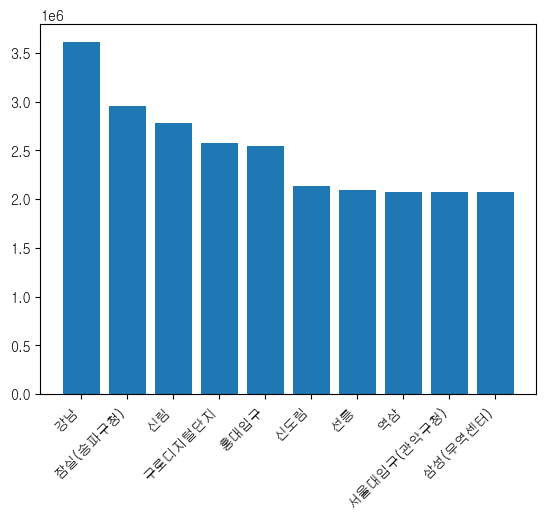

In [89]:
plt.bar(top10['역명'], top10['승하차총승객수'])
plt.xticks(rotation=45, ha='right')
plt.show()

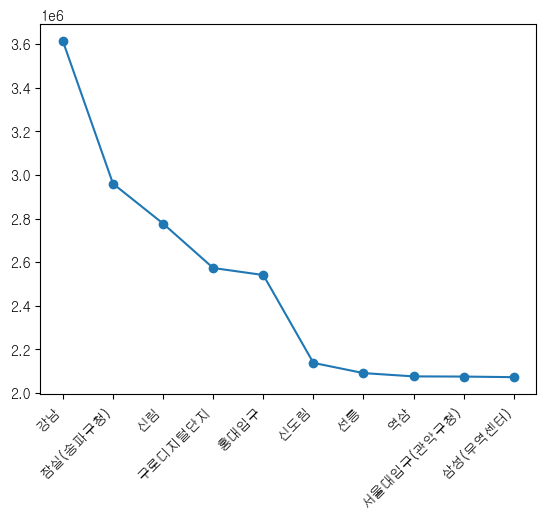

In [91]:
plt.plot(top10['역명'], top10['승하차총승객수'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.show()

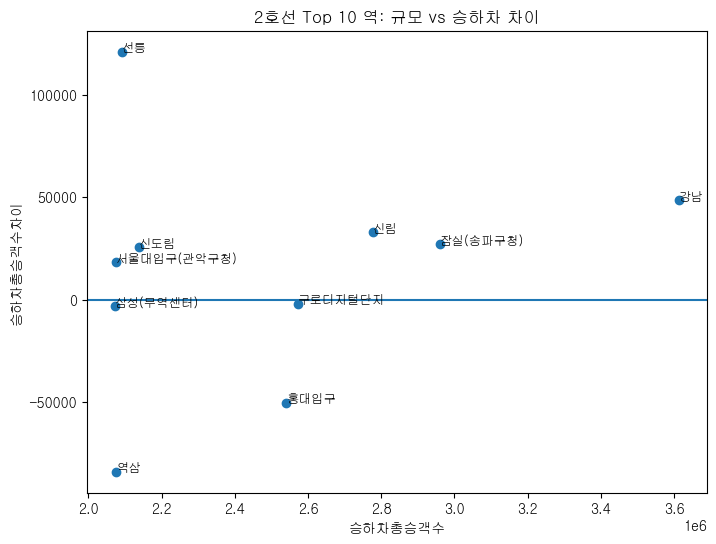

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(
    top10['승하차총승객수'],
    top10['승하차총승객수차이']
)
plt.axhline(0)  # 기준선
plt.title('2호선 Top 10 역: 규모 vs 승하차 차이')
plt.xlabel('승하차총승객수')
plt.ylabel('승하차총승객수차이')


# 역명 라벨
for i in range(len(top10)):
    plt.text(
        top10['승하차총승객수'].iloc[i],
        top10['승하차총승객수차이'].iloc[i],
        top10['역명'].iloc[i],
        fontsize=9
    )
plt.show()

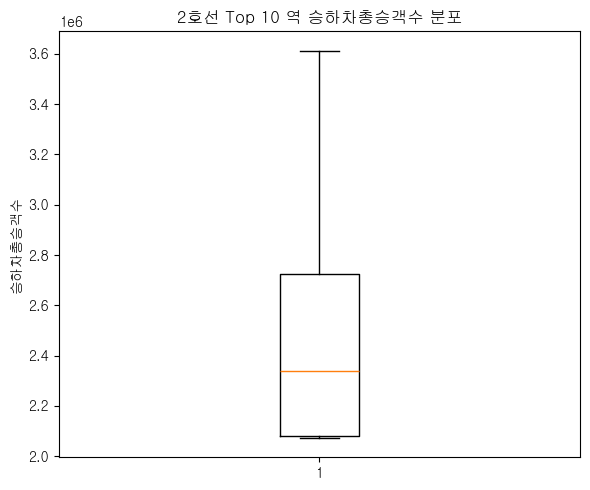

In [94]:
plt.figure(figsize=(6,5))
plt.boxplot(top10['승하차총승객수'])
plt.title('2호선 Top 10 역 승하차총승객수 분포')
plt.ylabel('승하차총승객수')
plt.tight_layout()
plt.show()